<a href="https://colab.research.google.com/github/hoseinAkbari97/machine_learning_course/blob/main/Chapter_01_Supervised_Learning/regression/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [3]:
# Simulating data (for example 1000 data)
n = 1000
x = np.random.normal(3, 5, size=n)
noise = np.random.normal(0, 3, size=n)
# Assume noisy output
y = -15 * x + 20 + noise

In [8]:
# Analytical method of solving the linear regression problem
X = np.sum(x)
Y = np.sum(y)
w1 = (n * np.dot(x,y) - Y*X) / (n*np.dot(x,x)-X**2)
w0 = (Y-w1*X)/n
w1, w0 = round(w1, 2), round(w0, 2)
print(f"y = {w1} x + {w0}")

y = -15.01 x + 20.07


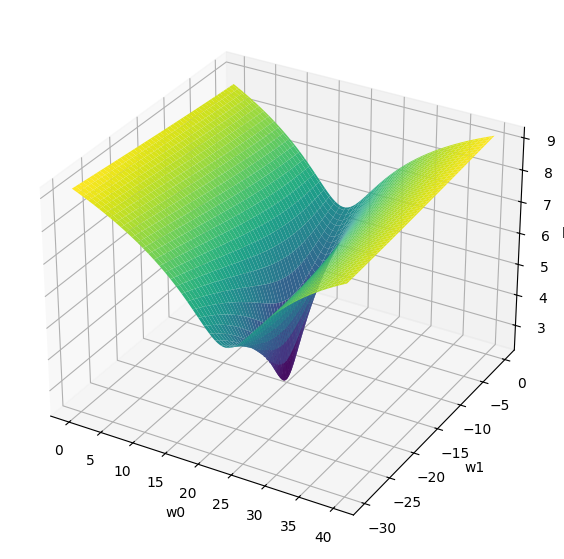

In [9]:
# Performance measure
def MSE_loss(w0, w1, x, y):
  predicted = w0 + w1 * x
  loss = np.sum((predicted - y) ** 2) / len(y)
  return loss

# Generating a grid of w0 and w1 values around the real w0=20 and w1=-15
w0_vals = np.linspace(0, 40, 100)
w1_vals = np.linspace(-30, 0, 100)

# Calculating the MSE loss for each point of this grid
# log-scale is used only for better visualization
Z = np.zeros((len(w0_vals), len(w1_vals)))
for i in range(len(w0_vals)):
  for j in range(len(w1_vals)):
    Z[i, j] = np.log(MSE_loss(w0_vals[i], w1_vals[j], x, y))

# 3D plot of MSE loss in log-scale
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, Z, cmap='viridis')

# Adding labels
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
plt.show()